In [20]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
iris_ds = datasets.load_iris()

# Perceptron

In [60]:
# 1. initialize weights w and bias b to be 0 or small values near 0.
# 2. For each training example x^{i}, 
# find the predicted output, y^{hat_i}
# update the weights and bias using the formula
# w = w + delta(w) and b = b + delta(b)

# where 
# delta(w) = lr * (y^{i} - y^{hat_i}) * x^{i}
# delta(b) = lr * (y^{i} - y^{hat_i})

# 3. Do the same for the rest of the training examples

In [3]:
class Perceptron:

    """
    Parameters
    lr: float
        learning rate
    epoch: int
        number of training loops
    random_state: int
        rng seed for weights b_ and w_
    
    Attributes
    w_: 1d-array
        weights
    b_: scalar
        bias
    errors_: list
        Number of misclassification (updates) for each epoch
    """
    def __init__(self, lr = 0.01, epoch = 50, random_state = 1):
        self.lr = lr
        self.epoch = epoch
        self.random_state = random_state

    def fit(self, X, y):
        rng = np.random.default_rng(self.random_state)

        self.w_ = rng.normal(loc = 0.0, scale = 0.01, size = X.shape[1])
        self.b_ = np.float32(0)
        self.errors_ = []
        
        for _ in range(self.epoch):
            errors = 0.0
            for example_i, target in zip(X, y):
                update = self.lr * (target - self.predict(example_i))
                self.w_ += update * example_i
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, xi):
        # for activation function
        return np.dot(xi, self.w_) + self.b_
    
    def predict(self, xi):
        return np.where(self.net_input(xi) >= 0.0, 1, 0)



In [9]:
test = Perceptron(lr = 0.05, epoch = 10, random_state = 42)

In [10]:
test.fit(iris_ds["data"][:100], iris_ds["target"][:100])

In [11]:
test.b_

np.float64(-0.05)

In [12]:
test.w_

array([-0.03195283, -0.15539984,  0.27250451,  0.11440565])

In [13]:
test.errors_

[2.0, 2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [14]:
vars(test)

{'lr': 0.05,
 'epoch': 10,
 'random_state': 42,
 'w_': array([-0.03195283, -0.15539984,  0.27250451,  0.11440565]),
 'b_': np.float64(-0.05),
 'errors_': [2.0, 2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}

In [54]:
len(test.errors_)

10

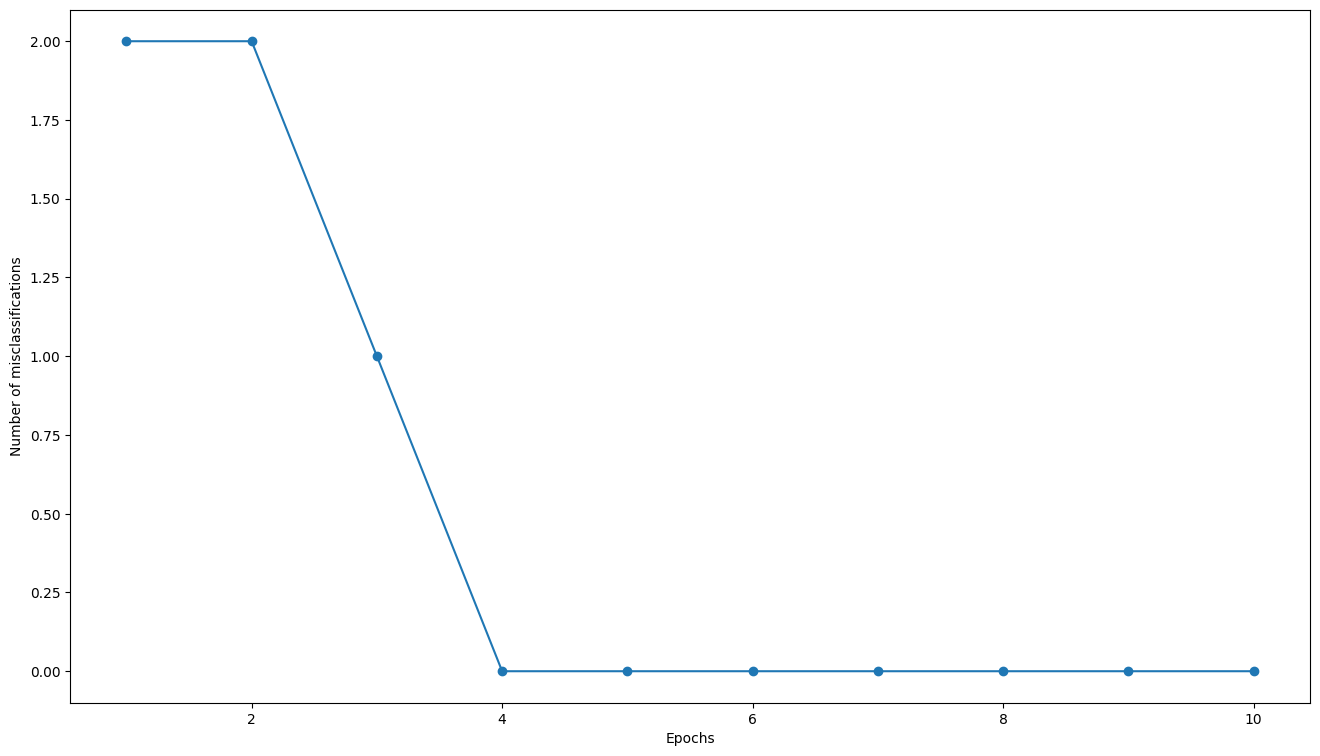

In [56]:
fig = plt.figure(figsize = (16,9))
ax = fig.add_subplot(111)
ax.plot(np.arange(1, len(test.errors_)+1), test.errors_, marker = "o")
ax.set_xlabel("Epochs")
ax.set_ylabel("Number of misclassifications")
plt.show()

In [17]:
iris_ds["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [19]:
iris_ds["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

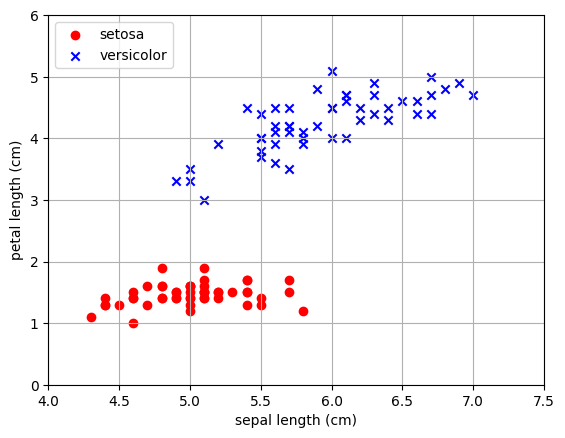

In [48]:
# Scatter plot

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(iris_ds["data"][:50, 0], iris_ds["data"][:50, 2], c = "r", marker = "o", label = iris_ds["target_names"][0].item())
ax.scatter(iris_ds["data"][50:100, 0], iris_ds["data"][50:100, 2], c = "b", marker = "x", label = iris_ds["target_names"][1].item())
ax.set_ylim(0, 6)
ax.set_xlim(4, 7.5)
ax.set_ylabel(iris_ds["feature_names"][2])
ax.set_xlabel(iris_ds["feature_names"][0])
ax.legend(loc = "upper left")
ax.grid()
plt.show()

# Adaline